In [1]:
# Import dependencies:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Read csv file and store into dataframe:

complete_df = pd.read_csv("Resources/athlete_events.csv")
complete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [2]:
# Create a new dataframe consisting of athlete data only:

athlete_df = complete_df[["ID", "Name", "Height", "Weight", "Year", "Sport", "Medal"]]
athlete_df.dropna(subset = ['Height', 'Weight'])

athlete_df

,ID,Name,Height,Weight,Year,Sport,Medal
0,1,A Dijiang,180.0,80.0,1992,Basketball,NaN
1,2,A Lamusi,170.0,60.0,2012,Judo,NaN
2,3,Gunnar Nielsen Aaby,NaN,NaN,1920,Football,NaN
3,4,Edgar Lindenau Aabye,NaN,NaN,1900,Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,185.0,82.0,1988,Speed Skating,NaN
...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,179.0,89.0,1976,Luge,NaN
271112,135570,Piotr ya,176.0,59.0,2014,Ski Jumping,NaN
271113,135570,Piotr ya,176.0,59.0,2014,Ski Jumping,NaN
271114,135571,Tomasz Ireneusz ya,185.0,96.0,1998,Bobsleigh,NaN


In [3]:
# Calculate BMI of all athletes and store into a new column:

weight = athlete_df["Weight"]
weight

0         80.0
1         60.0
2          NaN
3          NaN
4         82.0
          ... 
271111    89.0
271112    59.0
271113    59.0
271114    96.0
271115    96.0
Name: Weight, Length: 271116, dtype: float64

In [4]:
height = athlete_df["Height"]/100

BMI = weight / height

athlete_df["BMI"] = BMI

athlete_df

C:\Users\jadha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ID,Name,Height,Weight,Year,Sport,Medal,BMI
0,1,A Dijiang,180.0,80.0,1992,Basketball,NaN,44.444444
1,2,A Lamusi,170.0,60.0,2012,Judo,NaN,35.294118
2,3,Gunnar Nielsen Aaby,NaN,NaN,1920,Football,NaN,NaN
3,4,Edgar Lindenau Aabye,NaN,NaN,1900,Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,185.0,82.0,1988,Speed Skating,NaN,44.324324
...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,179.0,89.0,1976,Luge,NaN,49.720670
271112,135570,Piotr ya,176.0,59.0,2014,Ski Jumping,NaN,33.522727
271113,135570,Piotr ya,176.0,59.0,2014,Ski Jumping,NaN,33.522727
271114,135571,Tomasz Ireneusz ya,185.0,96.0,1998,Bobsleigh,NaN,51.891892


In [5]:
athlete_df = athlete_df[["ID", "Name", "Height", "Weight", "BMI", "Year", "Sport", "Medal"]]

athlete_df

,ID,Name,Height,Weight,BMI,Year,Sport,Medal
0,1,A Dijiang,180.0,80.0,44.444444,1992,Basketball,NaN
1,2,A Lamusi,170.0,60.0,35.294118,2012,Judo,NaN
2,3,Gunnar Nielsen Aaby,NaN,NaN,NaN,1920,Football,NaN
3,4,Edgar Lindenau Aabye,NaN,NaN,NaN,1900,Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,185.0,82.0,44.324324,1988,Speed Skating,NaN
...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,179.0,89.0,49.720670,1976,Luge,NaN
271112,135570,Piotr ya,176.0,59.0,33.522727,2014,Ski Jumping,NaN
271113,135570,Piotr ya,176.0,59.0,33.522727,2014,Ski Jumping,NaN
271114,135571,Tomasz Ireneusz ya,185.0,96.0,51.891892,1998,Bobsleigh,NaN


In [6]:
# Organize the data by year:

min_year = athlete_df["Year"].min()
max_year = athlete_df["Year"].max()

print(f"{min_year}, {max_year}")

1896, 2016


In [7]:
# Create bins and bin labels for year:
bins = [0, 1917, 1937, 1957, 1977, 1997, 2017]
bin_labels = ["<1917", "1918-1937", "1938-1957", "1958-1977", "1978-1997", "1998-2017"]

# Assign data to bins:
athlete_df["Year Range"] = pd.cut(athlete_df["Year"], bins, labels=bin_labels, include_lowest=True)
athlete_df 

C:\Users\jadha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Name,Height,Weight,BMI,Year,Sport,Medal,Year Range
0,1,A Dijiang,180.0,80.0,44.444444,1992,Basketball,NaN,1978-1997
1,2,A Lamusi,170.0,60.0,35.294118,2012,Judo,NaN,1998-2017
2,3,Gunnar Nielsen Aaby,NaN,NaN,NaN,1920,Football,NaN,1918-1937
3,4,Edgar Lindenau Aabye,NaN,NaN,NaN,1900,Tug-Of-War,Gold,<1917
4,5,Christine Jacoba Aaftink,185.0,82.0,44.324324,1988,Speed Skating,NaN,1978-1997
...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,179.0,89.0,49.720670,1976,Luge,NaN,1958-1977
271112,135570,Piotr ya,176.0,59.0,33.522727,2014,Ski Jumping,NaN,1998-2017
271113,135570,Piotr ya,176.0,59.0,33.522727,2014,Ski Jumping,NaN,1998-2017
271114,135571,Tomasz Ireneusz ya,185.0,96.0,51.891892,1998,Bobsleigh,NaN,1998-2017


In [8]:
# Create separate dataframes for all year ranges:

year_1917_df = athlete_df.loc[athlete_df["Year Range"]=="<1917"]
year_1937_df = athlete_df.loc[athlete_df["Year Range"]=="1918-1937"]
year_1957_df = athlete_df.loc[athlete_df["Year Range"]=="1938-1957"]
year_1977_df = athlete_df.loc[athlete_df["Year Range"]=="1958-1977"]
year_1997_df = athlete_df.loc[athlete_df["Year Range"]=="1978-1997"]
year_2017_df = athlete_df.loc[athlete_df["Year Range"]=="1998-2017"]

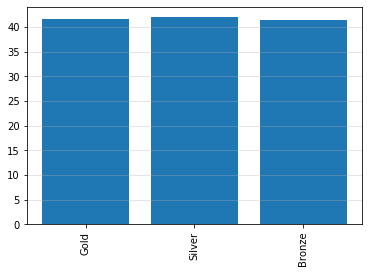

In [9]:
# Find mean athlete BMIs for all year ranges:

mean_BMI_1917 = year_1917_df["BMI"].mean()
mean_BMI_1937 = year_1937_df["BMI"].mean()
mean_BMI_1957 = year_1957_df["BMI"].mean()
mean_BMI_1977 = year_1977_df["BMI"].mean()
mean_BMI_1997 = year_1997_df["BMI"].mean()
mean_BMI_1917 = year_1917_df["BMI"].mean()


plt.xticks(rotation=90)
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.grid(axis="y", alpha=0.4)
plt.show()

